<a href="https://colab.research.google.com/github/roccodecarolis/HEDS_DATA/blob/main/HEDS_Data_Analysis_Regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#first thing import libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

In [ ]:
#now import the previously cleaned Final Dataset from GitHub

In [2]:
filePath = 'https://raw.githubusercontent.com/roccodecarolis/HEDS_DATA/refs/heads/main/Final_Dataset.csv'
Dataset = pd.read_csv(filePath, sep = ';')

In [ ]:
#explore data, check for anomalies and make some visualization

In [3]:
Dataset

,geocode,municipality,Disease_Burden,deorg,tot2010,prop_urb2010,prop_rur2010,ipm
0,1100015,Alta Floresta D'Oeste,3420.0,0.044776,24392.0,0.572729,0.427271,0.174966
1,1100023,Ariquemes,79733.0,0.060120,90353.0,0.846956,0.153044,0.133847
2,1100031,Cabixi,472.0,0.050256,6313.0,0.426580,0.573420,0.163211
3,1100049,Cacoal,12135.0,0.023383,78574.0,0.788060,0.211940,0.133524
4,1100056,Cerejeiras,1435.0,0.024318,17029.0,0.846732,0.153268,0.170135
...,...,...,...,...,...,...,...,...
767,5108600,Vila Rica,765.0,0.097319,21382.0,0.652979,0.347021,0.173011
768,5108808,Nova Guarita,190.0,0.034057,4932.0,0.393350,0.606650,0.139920
769,5108857,Nova Marilândia,151.0,0.066691,2951.0,0.663165,0.336835,0.115024
770,5108907,Nova Maringá,688.0,0.068889,6590.0,0.519120,0.480880,0.163307


In [4]:
Dataset.describe()

,geocode,Disease_Burden,deorg,prop_urb2010,prop_rur2010,ipm
count,7.720000e+02,772.000000,770.000000,772.000000,772.000000,772.000000
mean,2.288414e+06,8056.792746,0.038445,0.573806,0.426194,0.211689
std,1.365993e+06,35058.650576,0.033513,0.194468,0.194468,0.056686
min,1.100015e+06,0.000000,0.000000,0.041789,0.002460,0.007272
25%,1.502798e+06,169.750000,0.015929,0.432349,0.284150,0.174271
50%,1.713254e+06,626.000000,0.032950,0.565221,0.434779,0.222190
75%,2.109278e+06,3142.500000,0.050909,0.715850,0.567651,0.252832
max,5.108956e+06,678111.000000,0.255582,0.997540,0.958211,0.342536


In [5]:
print(Dataset.isna().sum())

geocode           0
municipality      0
Disease_Burden    0
deorg             2
tot2010           0
prop_urb2010      0
prop_rur2010      0
ipm               0
dtype: int64


In [6]:
Dataset['deorg'] = Dataset['deorg'].fillna(Dataset['deorg'].mean())

In [7]:
print(Dataset.isna().sum())

geocode           0
municipality      0
Disease_Burden    0
deorg             0
tot2010           0
prop_urb2010      0
prop_rur2010      0
ipm               0
dtype: int64


In [ ]:
#prepare the data - define dependent variable and predictors

In [11]:
X = Dataset[['deorg', 'prop_urb2010', 'prop_rur2010', 'ipm']]
Y = Dataset['Disease_Burden']

In [ ]:
#split the data into train/test

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [ ]:
#fit the Linear Regression and Train Model

In [15]:
regressionModel = LinearRegression()
regressionModel.fit(X_train, Y_train)

LinearRegression()

In [ ]:
#now: y prediction

In [17]:
Y_prediction= regressionModel.predict(X_test)

In [ ]:
#visualization of predictions vs actual

In [18]:
result = pd.DataFrame(Y_test)
result["Y_predict"] = Y_prediction
print(result.head(20))

     Disease_Burden     Y_predict
545            93.0   5374.778315
679           243.0  15799.771787
400           336.0  15243.326856
14           7588.0  13466.367435
548           440.0  14586.995350
278           131.0  11676.436473
122         57188.0   6641.792828
740           973.0  12378.294618
385           605.0  16572.480797
196          2448.0   9709.242875
31          69740.0   9952.517219
481           258.0   1225.735445
604           522.0   5024.337719
556           156.0   8556.384259
576           450.0   3845.270763
299           256.0   7281.302787
652          1435.0  17649.328844
397            63.0  13284.457877
741           691.0  12938.540101
172          1589.0   8024.049428


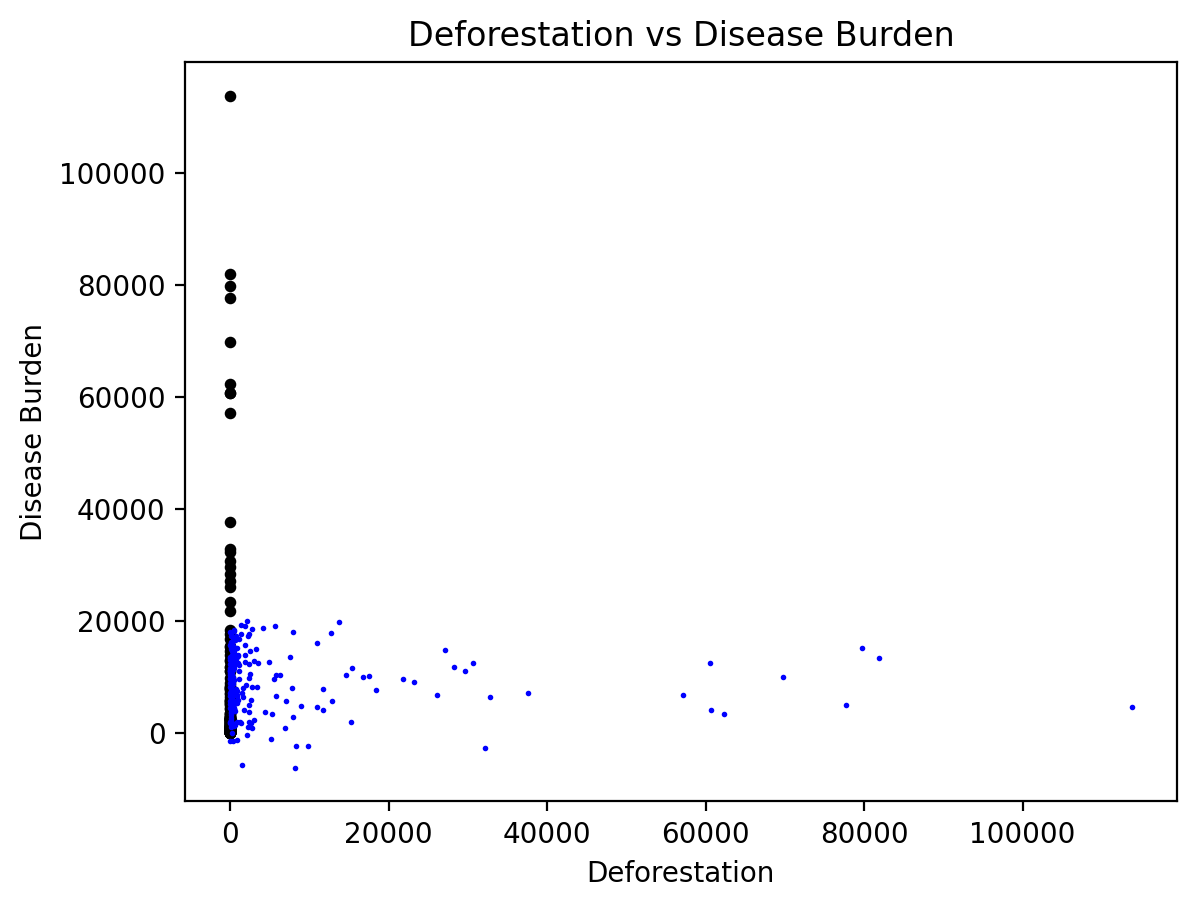

In [24]:
plt.figure(dpi=200)
plt.scatter(X_test['deorg'], Y_test, color='black', s=10)
plt.scatter(Y_test, Y_prediction , color='blue', s=1)
plt.title('Deforestation vs Disease Burden')
plt.xlabel('Deforestation')
plt.ylabel('Disease Burden')
plt.show()

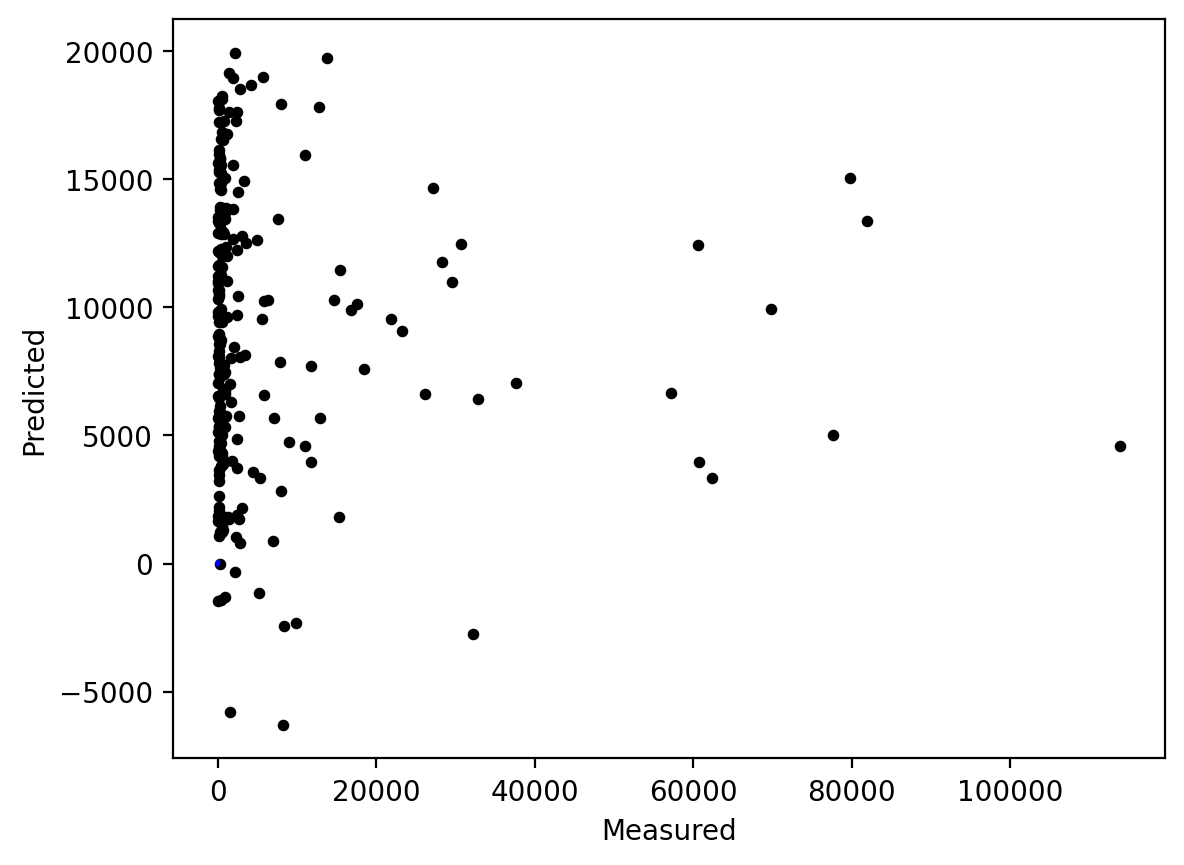

In [28]:
plt.figure(dpi=200)
plt.scatter(Y_test, Y_prediction, color='black', s=10)
plt.plot([-30, 50], [-30, 50], color='blue')
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.show()

In [ ]:
#Now: evaluation with R_squared method

In [27]:
R_squared = regressionModel.score(X_test,Y_test)
print('R_squared', R_squared)

R_squared -0.18809409023174473


In [ ]:
#Now we investigate the relation between variables

In [30]:
import statsmodels.api as sm
mod = sm.OLS(Y.astype(float), X.astype(float)).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Disease_Burden   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     2.440
Date:                Sun, 06 Apr 2025   Prob (F-statistic):             0.0632
Time:                        13:15:23   Log-Likelihood:                -9170.1
No. Observations:                 772   AIC:                         1.835e+04
Df Residuals:                     768   BIC:                         1.837e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
deorg        -3572.8611   3.85e+04     -0.093      0.926   -7.92e+04     7.2e+04
prop_urb2010  1.402e+04   5446.229      2.575      0.010    3331.983    2.47e+04
prop_rur2010 -4116.4215   8024.322     -0.513      0.608   -1.99e+04    1.16e+04
ipm           8984.4592    2.4e+04      0.374      0.709   -3.82e+04    5.62e+04
==============================================================================
Omnibus:                     1451.273   Durbin-Watson:                   1.792
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1505822.677
Skew:                          13.083   Prob(JB):                         0.00
Kurtosis:                     217.775   Cond. No.                         23.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#my model is not working
#I'll now try if the model makes better with different variables

In [32]:
X2 = Dataset[['deorg', 'ipm']]
Y2 = Dataset['Disease_Burden']

In [33]:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size=0.3, random_state=0)

In [35]:
regressionModel = LinearRegression()
regressionModel.fit(X2_train, Y2_train)

LinearRegression()

In [36]:
Y2_prediction= regressionModel.predict(X2_test)

In [37]:
result = pd.DataFrame(Y2_test)
result["Y2_predict"] = Y2_prediction
print(result.head(20))

     Disease_Burden    Y2_predict
545            93.0  10418.028361
679           243.0  12790.540255
400           336.0   9500.574085
14           7588.0  11553.043754
548           440.0   6579.478469
278           131.0  11400.801924
122         57188.0  11632.482634
740           973.0   7920.016602
385           605.0   9718.790249
196          2448.0   6993.298104
31          69740.0   8314.360836
481           258.0   7280.620418
604           522.0   8540.965622
556           156.0  10285.301588
576           450.0   8003.355358
299           256.0   9243.574812
652          1435.0  12706.371084
397            63.0   8163.770912
741           691.0  10425.283095
172          1589.0   8541.501211


In [38]:
R_squared = regressionModel.score(X2_test,Y2_test)
print('R_squared', R_squared)

R_squared -0.07640244238747962


In [ ]:
#one last try

In [80]:
X3 = Dataset[['deorg', 'prop_rur2010']]
Y3 = Dataset['Disease_Burden']
X3_train, X3_test, Y3_train, Y3_test = train_test_split(X3, Y3, test_size=0.3, random_state=0)

In [81]:
regressionModel = LinearRegression()
regressionModel.fit(X3_train, Y3_train)

LinearRegression()

In [82]:
Y3_prediction= regressionModel.predict(X3_test)

In [83]:
result = pd.DataFrame(Y3_test)
result["Y3_predict"] = Y3_prediction
print(result.head(20))

     Disease_Burden    Y3_predict
545            93.0   5530.638938
679           243.0  16504.888260
400           336.0  15255.128125
14           7588.0  13995.394121
548           440.0  13962.510251
278           131.0  12058.147002
122         57188.0   7265.435345
740           973.0  12645.502738
385           605.0  16624.280895
196          2448.0   9488.565784
31          69740.0  10140.219760
481           258.0    988.445466
604           522.0   4708.149539
556           156.0   8500.650980
576           450.0   3514.368512
299           256.0   7485.458175
652          1435.0  18611.836960
397            63.0  12840.121003
741           691.0  13186.545868
172          1589.0   7894.270055


In [84]:
R_squared = regressionModel.score(X3_test,Y3_test)
print('R_squared', R_squared)

R_squared -0.18908803436425403


In [108]:
mod = sm.OLS(Y3.astype(float), X3.astype(float)).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         Disease_Burden   R-squared (uncentered):                   0.031
Model:                            OLS   Adj. R-squared (uncentered):              0.029
Method:                 Least Squares   F-statistic:                              12.36
Date:                Sun, 06 Apr 2025   Prob (F-statistic):                    5.19e-06
Time:                        14:17:07   Log-Likelihood:                         -9181.4
No. Observations:                 772   AIC:                                  1.837e+04
Df Residuals:                     770   BIC:                                  1.838e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
deorg         6.193e+04   3.54e+04      1.751      0.080   -7490.386    1.31e+05
prop_rur2010  7908.8863   3847.449      2.056      0.040     356.154    1.55e+04
==============================================================================
Omnibus:                     1460.493   Durbin-Watson:                   1.803
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1568369.153
Skew:                          13.254   Prob(JB):                         0.00
Kurtosis:                     222.214   Cond. No.                         13.1
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#my model is not working: it has a really bad r_squared
#it seems my data is extremely skewed - let's try to stabilize it

In [77]:
Dataset['log_Disease_Burden'] = np.log1p(Dataset['Disease_Burden'])

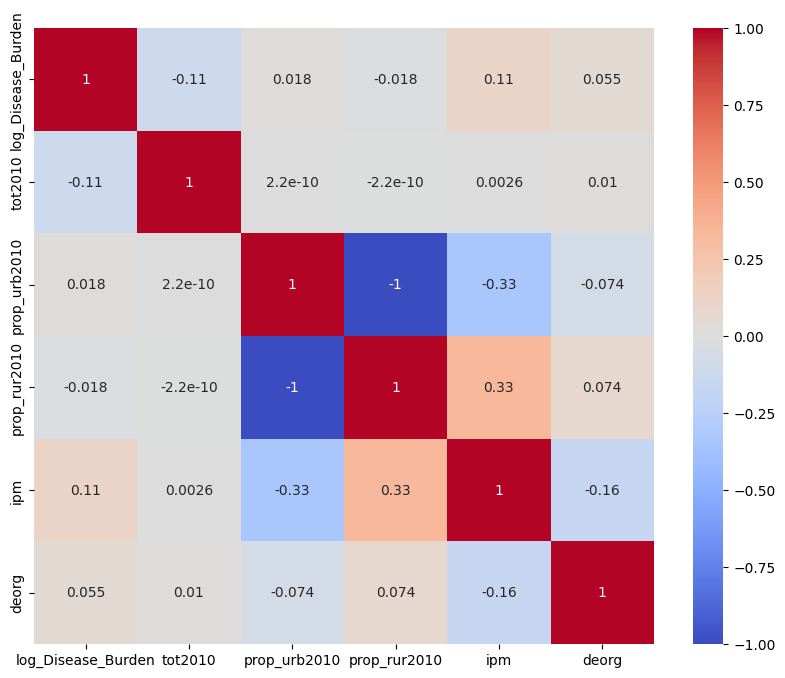

In [79]:
import seaborn as sns

corr = Dataset[['log_Disease_Burden', 'tot2010', 'prop_urb2010', 'prop_rur2010', 'ipm', 'deorg']].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
#for this step I used AI - asked how could I normalise skewed data and how to check correlation coefficients
#shows low correlation between variables
#the only indicator that seems slightly significant is the IPM

In [87]:
X4 = Dataset[['deorg', 'prop_rur2010', 'Disease_Burden']]
Y4 = Dataset['ipm']
X4_train, X4_test, Y4_train, Y4_test = train_test_split(X4, Y4, test_size=0.3, random_state=0)

In [88]:
regressionModel = LinearRegression()
regressionModel.fit(X4_train, Y4_train)
Y4_prediction= regressionModel.predict(X4_test)

In [89]:
result = pd.DataFrame(Y4_test)
result["Y4_predict"] = Y4_prediction
print(result.head(20))

          ipm  Y4_predict
545  0.223768    0.240778
679  0.121597    0.198680
400  0.187173    0.188235
14   0.144555    0.202479
548  0.249076    0.180373
278  0.172187    0.213868
122  0.164781    0.233957
740  0.148610    0.177735
385  0.177478    0.182911
196  0.220123    0.195810
31   0.175474    0.196988
481  0.266048    0.240011
604  0.272062    0.237318
556  0.236821    0.230579
576  0.274166    0.237825
299  0.195635    0.217914
652  0.075784    0.181084
397  0.246564    0.197631
741  0.174726    0.201733
172  0.231578    0.217246


In [90]:
R_squared = regressionModel.score(X4_test,Y4_test)
print('R_squared', R_squared)

R_squared 0.16866716991061548


In [107]:
mod = sm.OLS(Y4.astype(float), X4.astype(float)).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    ipm   R-squared (uncentered):                   0.846
Model:                            OLS   Adj. R-squared (uncentered):              0.845
Method:                 Least Squares   F-statistic:                              1407.
Date:                Sun, 06 Apr 2025   Prob (F-statistic):                   1.06e-311
Time:                        14:14:36   Log-Likelihood:                          798.38
No. Observations:                 772   AIC:                                     -1591.
Df Residuals:                     769   BIC:                                     -1577.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
deorg              0.4479      0.086      5.196      0.000       0.279       0.617
prop_rur2010       0.3890      0.009     41.452      0.000       0.371       0.407
Disease_Burden  3.526e-07   8.77e-08      4.022      0.000     1.8e-07    5.25e-07
==============================================================================
Omnibus:                       31.964   Durbin-Watson:                   1.498
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.840
Skew:                          -0.503   Prob(JB):                     2.72e-08
Kurtosis:                       3.267   Cond. No.                     1.00e+06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large,  1e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#the model works better to predict poverty based on healthcare needs rather than the opposite
#however attention is needed here: the summary reports an uncentered value for R_squared which is not an accurate measure

In [ ]:
#now I am ready for interpretation
#my result was negative however it is not a defeat: we know now that these variables are not going to help us predict healthcare needs
#a possible explanation is that the original dataset for the deforestation indicator had a lot of N/A that I substituted with the mean value for that indicator: it could have corrupted the data - although I am not lenient towards this possibility
#we need to find new possible predictive variables and try with the new ones
#IPM can be used as it is slightly significant
#I learned that it was useless to use both urban and rural proportions of population
#Deforestation seemed to have to some extent some type of correlation; maybe we need to find a better indicator but that is still linked to it
#something that could enhance my research would be to have an indicator for population density vs healthcare facilities density, but I can't find it
#I also learned that this model, with some modifications, could be used to do the opposite I was trying to: predict poverty based on population, deforestation and disease burden